In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt

In [2]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay
def binning(delay):
    c= np.log(2.09)/2
    b = round(np.max(delay)/c)
    bins = np.arange(0,b)*c
    return bins

In [7]:
novelties = np.loadtxt('nov_wr_PUST_Nin_1000_p_9_q_7.000000_l_0.300000_seed_5090.txt',dtype = int)
types_ = np.loadtxt('Type_Of_Word_Nin_1000_p_9_q_7.000000_l_0.300000_seed_5090.txt',dtype=int)

In [16]:
seq = np.loadtxt('wr_PUST_Nin_1000_p_9_q_7.000000_l_0.300000_seed_5090.txt',dtype = int)

In [5]:
types_

array([1, 1, 1, ..., 4, 4, 4])

In [18]:
types_[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
novelties[:30]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [54]:
seq[:30]

array([ 696,  243,  522,  413,  952,  502,   33,  564,  212,  413,  854,
        854,  680,  577,  795,  981,  304,  113,  561,  841, 1050,  947,
        202,  937,  204, 1118,  533,  440,  942, 1226])

In [25]:
novelties[8],novelties[9]

(9, 11)

In [52]:
types_[novelties[1502]:novelties[1503]-1]

array([4, 5, 5, 4, 4, 4, 4, 4])

In [46]:
novelties[1501]-novelties[1500]

1

In [60]:
def pure_in_out(types,novs):
    dict_4 = []
    dict_5 = []
    #delays_ = delays(novs,True)
    #bins_ = binning(delays_)
    for idx,i in enumerate(novs[:-1]):
        if(novelties[idx+1]-novelties[idx]==1):
            pass
        else:
            chunk = types[novs[idx]:novs[idx+1]-1]
            tot_length = len(chunk)
            start_value = chunk[0]
            
            if(start_value == 4):
                control = True
            else:
                control = False
                    
            counter_start = 1
            for _,non_nov in enumerate(chunk[1:]):
                if non_nov == start_value:
                    counter_start+=1
                else:
                    if (control == True):
                        dict_4.append(counter_start)
                        control = !control
                        counter_start = 1
                        start_value = non_nov
                    else:
                        dict_5.append(counter_start)
                        control = !control
                        counter_start = 1
                        start_value = non_nov
                        
    return dict_4,dict_5
                
            
        
        
    

In [61]:
type_4,type_5 = pure_in_out(types_,novelties)

In [64]:
logs_5 = np.log(np.array(type_5))

In [68]:
logs_4 = np.log(np.array(type_4))

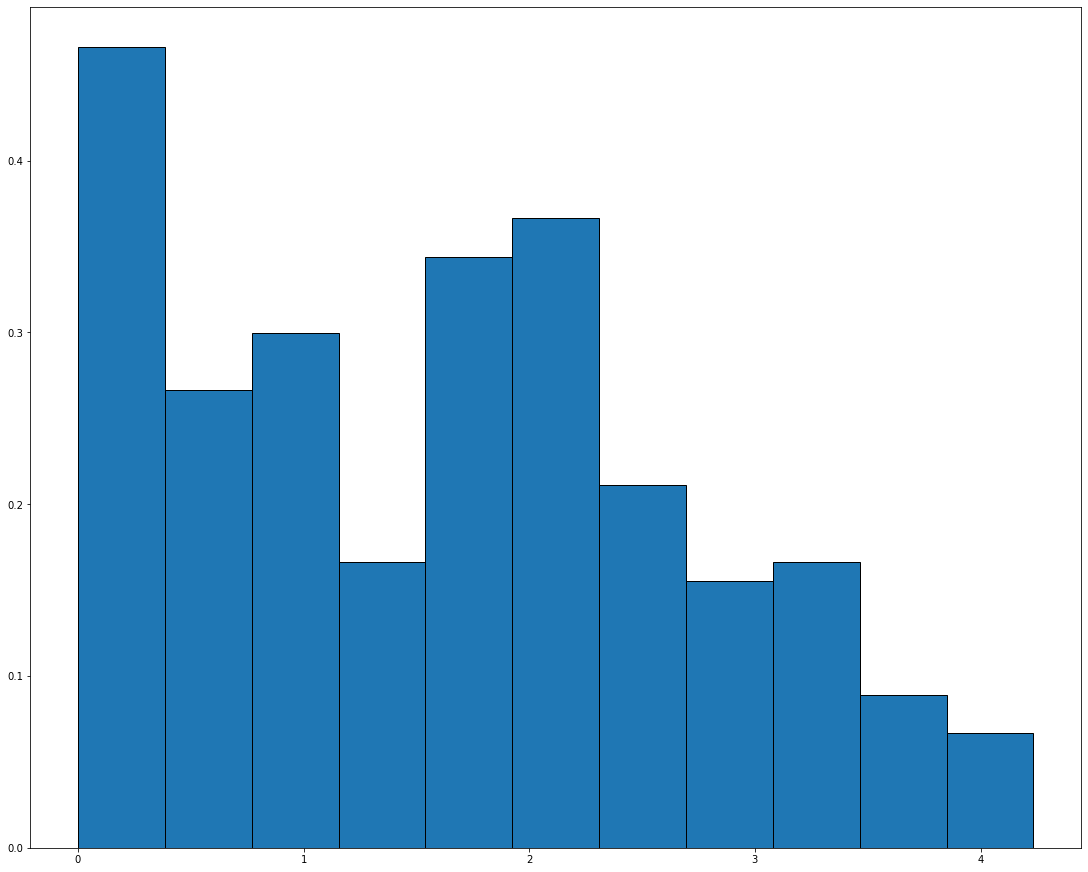

In [86]:
fig, axs = plt.subplots(figsize=(15,12),constrained_layout=True)
axs.hist(logs_4,density = True, bins=11,edgecolor = 'black')
plt.show()

In [78]:
len(logs_5)

84602